### Section 1
NHANES dataset link: https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES

In [32]:
# I would like to compare the relationship between Height and Race.

In [50]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install statsmodels --user 

You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
# Import data
# This is the NHANES data from courseworks that was used in lectures.
df = pd.read_csv('Data/NHANES.csv')

In [52]:
# Examine height
# This code creates a dataframe for adults 21 years and older.
adult_df = df[df['Age'] >= 21]

In [53]:
# This code gets black and white heights
black_df = adult_df[adult_df['Race1']=='Black']
white_df = adult_df[adult_df['Race1']=='White']

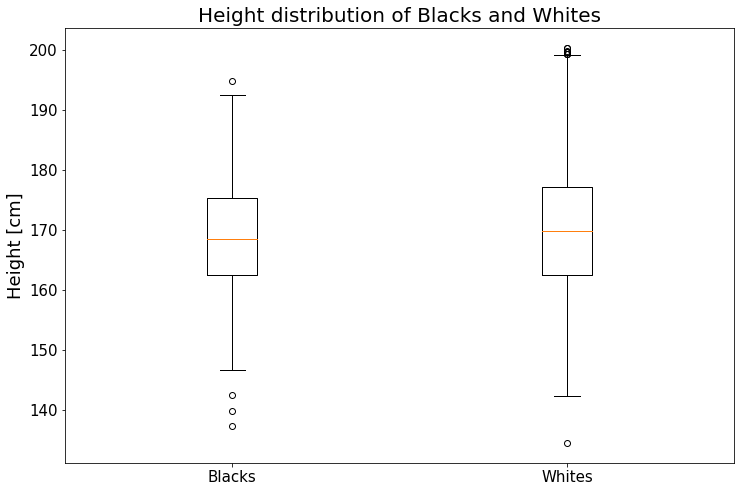

In [54]:
#This code creates a boxplot of Race and Height.
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['Height'].dropna(), white_df['Height'].dropna()])
plt.title('Height distribution of Blacks and Whites', fontsize=20)
axs.set_xticklabels(['Blacks','Whites'])
axs.set_ylabel('Height [cm]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [55]:
# This code gets the sample mean heights of each group.
# Visual shows about 169cm for blacks and about 170cm for whites.
print("Mean black height:", np.mean(black_df['Height'].dropna()))
print("Mean white height:", np.mean(white_df['Height'].dropna()))

Mean black height: 169.0081351689612
Mean white height: 169.99291305267613


In [56]:
# This code uses a function to caclualte a 95% CI of the sample means.
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [57]:
# This code displays the 95% CI of sample mean for black height.
CI_mean(black_df['Height'])

Average is: 169.0081351689612
95% CI of mean is: (168.34386796699656, 169.67240237092582)


In [58]:
# This code displays the 95% CI of sample mean for white height.
CI_mean(white_df['Height'])

Average is: 169.99291305267613
95% CI of mean is: (169.70994954661126, 170.275876558741)


In [115]:
# This code is a function to compute 95% CI of mean difference
# Sample Mean Difference 170-169 = 1
# Sample SE of Mean Difference = Squareroot[(sd^2/n)+(sd^2/n)]
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [60]:
CI_mean_diff(white_df['Height'], black_df['Height'])

The average difference is: 0.9847778837149406
The 95% CI is: (0.2627534648962724, 1.7068023025336088)


In [61]:
# Next I'll compare the mean difference of the two groups using a t-test.
# A t-test gives us a standrazied score that tells us how far we exect our 
# sample mean difference to deviate from the actual polulation mean difference. 

In [62]:
# Conduct a two sample t-test --- (Alt Mean Dif. - Null Mean Dif) / (SE of Alt Mean Dif.)
# Test Statistastic is more 0.66 standard erros away from (Null) Pop. Mean Dif of 0.
from scipy import stats

t_val, p_val = stats.ttest_ind(white_df['Height'].dropna(), black_df['Height'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 2.66316834797692
p-value: 0.007853100472483943


In [63]:
#How can I report two sample t test results?
#Our test statistic is more than 2 standard erros away from the assumption
#Or null value of a zero difference. 
#A value considered too extreme to be attritbuted by chance alone.
#This gives us a p-value of less than 0.05 and allows us to claim a
#statiatically significant difference.

# One of the best ways to understand this is to search the internet

In [116]:
##############################################################################################

In [64]:
##############################################################################################

In [117]:
# As a next step, I will be comparing Race and Weight
# Are Whites more likely to be carry more weight? Or, are they more likely to be to weight less than blacks?

In [66]:
# Code gets black and white Weights
black_df = adult_df[adult_df['Race1']=='Black']
white_df = adult_df[adult_df['Race1']=='White']

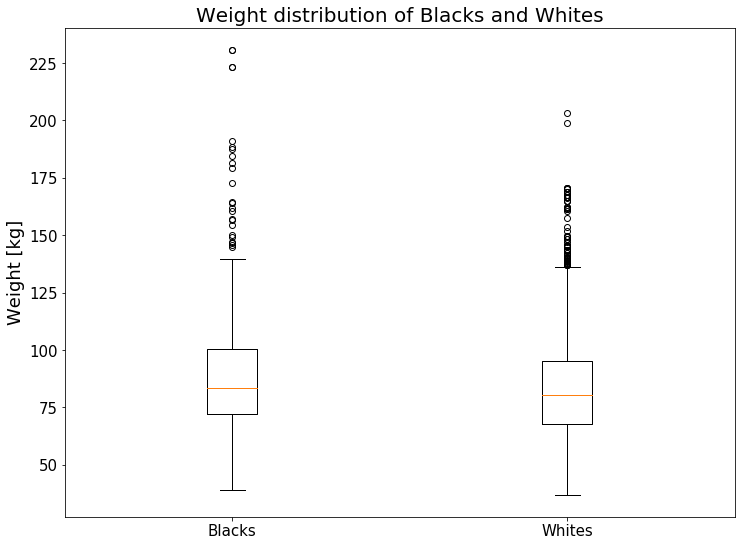

In [118]:
# This code creates the boxplot
fig, axs = plt.subplots(figsize=(12,9))
axs.boxplot([black_df['Weight'].dropna(), white_df['Weight'].dropna()])
plt.title('Weight distribution of Blacks and Whites', fontsize=20)
axs.set_xticklabels(['Blacks','Whites'])
axs.set_ylabel('Weight [kg]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [120]:
# Code gets the average weight of each group
# Visual shows about 85kg for blacks and about 80kg for whites.
print("Mean black weight:", np.mean(black_df['Weight'].dropna()))
print("Mean white weight:", np.mean(white_df['Weight'].dropna()))

Mean black weight: 88.31650000000002
Mean white weight: 82.89661016949152


In [69]:
# This code computes the 95% CI of mean by using the following function
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [70]:
# This code calcualtes the 95% CI of mean black wieght
CI_mean(black_df['Weight'])

Average is: 88.31650000000002
95% CI of mean is: (86.57993168539244, 90.0530683146076)


In [71]:
# This code calculates 95% CI of mean white weight
CI_mean(white_df['Weight'])

Average is: 82.89661016949152
95% CI of mean is: (82.30734541311776, 83.48587492586529)


In [72]:
# This is a function to compute the 95% CI of mean difference
# Sample Mean Difference 88-83 = 5
# Sample SE of Mean Difference = Squareroot[(sd^2/n)+(sd^2/n)]
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [73]:
CI_mean_diff(black_df['Weight'], white_df['Weight'])

The average difference is: 5.419889830508495
The 95% CI is: (3.586068011355054, 7.253711649661937)


In [74]:
# This code computes a comparison of the mean difference of two groups using a t test.
# Conduct a two sample t-test --- (Alt Mean Dif. - Null Mean Dif) / (SE of Alt Mean Dif.)
# Test Statistastic is more 0.5 standard erros away from (Null) Pop. Mean Dif of 0.
from scipy import stats

t_val, p_val = stats.ttest_ind(black_df['Weight'].dropna(), white_df['Weight'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 5.7737999155329955
p-value: 1.0360606698051266e-08


In [ ]:
##############################################################################################

In [76]:
##############################################################################################

In [122]:
# Examining PhysActiveDays
# This code will create a dataframe for adults
adult_df = df[df['Age'] >= 21]

In [123]:
# This code gets black and white weights
black_df = adult_df[adult_df['Race1']=='Black']
white_df = adult_df[adult_df['Race1']=='White']

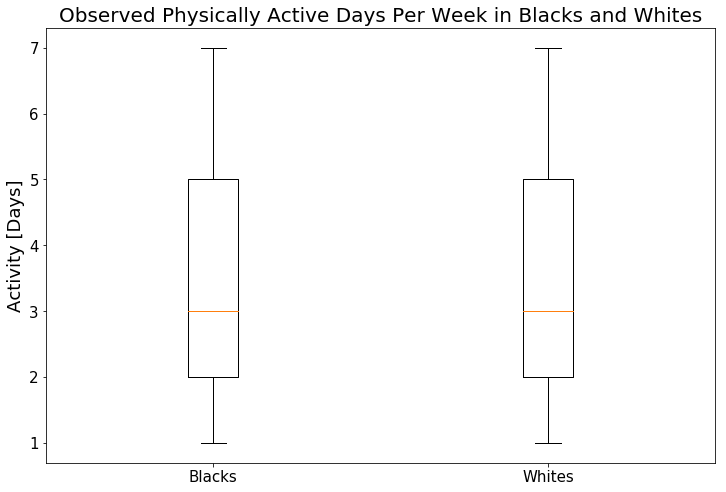

In [124]:
# Code creates boxplot
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['PhysActiveDays'].dropna(), white_df['PhysActiveDays'].dropna()])
plt.title('Observed Physically Active Days Per Week in Blacks and Whites', fontsize=20)
axs.set_xticklabels(['Blacks','Whites'])
axs.set_ylabel('Activity [Days]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [82]:
# Code gets the average Days Active per Week of each group
# Visual shows about 3 days for both
print("Mean black Phys. Active Days:", np.mean(black_df['PhysActiveDays'].dropna()))
print("Mean white Phys. Active Days:", np.mean(white_df['PhysActiveDays'].dropna()))

Mean black Phys. Active Days: 3.6793478260869565
Mean white Phys. Active Days: 3.7011161637040098


In [125]:
# Code computes 95% CI of mean by using this function
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [129]:
# Code generates the 95% CI of mean black wieght
CI_mean(black_df['PhysActiveDays'])

Average is: 3.6793478260869565
95% CI of mean is: (3.552350832585621, 3.806344819588292)


In [130]:
# Code gerates the 95% CI of mean white weight
CI_mean(white_df['PhysActiveDays'])

Average is: 3.7011161637040098
95% CI of mean is: (3.6500365802321433, 3.7521957471758762)


In [131]:
# This code is a function to compute 95% CI of mean difference
# Sample Mean Difference 3.7-3.7 = 0
# Sample SE of Mean Difference = Squareroot[(sd^2/n)+(sd^2/n)]
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [132]:
# Code generates the mean difference.
CI_mean_diff(white_df['PhysActiveDays'], black_df['PhysActiveDays'])

The average difference is: 0.021768337617053213
The 95% CI is: (-0.11511613997641831, 0.15865281521052474)


In [88]:
# This code computes a comparison of the mean difference of two groups using a t test.
# Conduct a two sample t-test --- (Alt Mean Dif. - Null Mean Dif) / (SE of Alt Mean Dif.)
# Test Statistastic is more 0.5 standard erros away from (Null) Pop. Mean Dif of 0.
from scipy import stats

t_val, p_val = stats.ttest_ind(black_df['PhysActiveDays'].dropna(), white_df['PhysActiveDays'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: -0.21207879336378466
p-value: 0.8321355850199659


In [90]:
#############################################################################################

In [91]:
#############################################################################################

In [135]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#df = pd.read_csv("Data/NHANES.csv")


In [136]:
#Code to create a bar chart

#x_values = ['Male', ['Female']]
#y_values = df['BMI']

#fig, axs = plt.subplots(figsize=(5,6)) # Change the figure size here       
#axs.bar(x_values, y_values, color=('deepskyblue'), width=0.5) # You specify the color here     
#axs.set_title("Plot Title", fontsize=20, fontweight="20")   
#axs.set_xlabel("x-axis label", fontsize=14)
#axs.set_ylabel("y-axis label", fontsize=14)
#axs.tick_params(labelsize=16)              
#plt.show() 


In [147]:
#data = df[['BMI', 'Gender']]
#data = data.dropna()
#data

In [138]:
#def function(row):
#    if row['BMI'] >= 40:
#        return 'Severe Obesity'
#    elif row['BMI'] >= 30:
#        return 'Obesity'
#    elif row['BMI'] >= 25:
#        return 'Overweight'
#    elif row['BMI'] >= 18.5:
#        return 'Normal'
#    elif row['BMI'] < 18.5:
#        return 'Underweight'
#    else:
#        return 'NaN'

In [139]:
#data['Obesity'] = data.apply(function, axis=1)

In [140]:
#table = pd.crosstab(index=data["Obesity"], columns=data["Gender"]) 
#table

In [141]:
#table.columns

In [142]:
#import numpy as np
#total = 0
#for gender in table.columns:
#    total += np.sum(table[gender])
#print(total)

In [143]:
#chi2, p, dof, expected = stats.chi2_contingency(table)

#print("chi2:", chi2)
#print("p:", p)
#print("dof:", dof)
#print("expected:", expected)

In [101]:
##########################################################################################

In [ ]:
##########################################################################################

In [105]:
# Next, I'll compare household income and weight.
# Are the well-heeled also heavier? Or, is weight independent of household income?

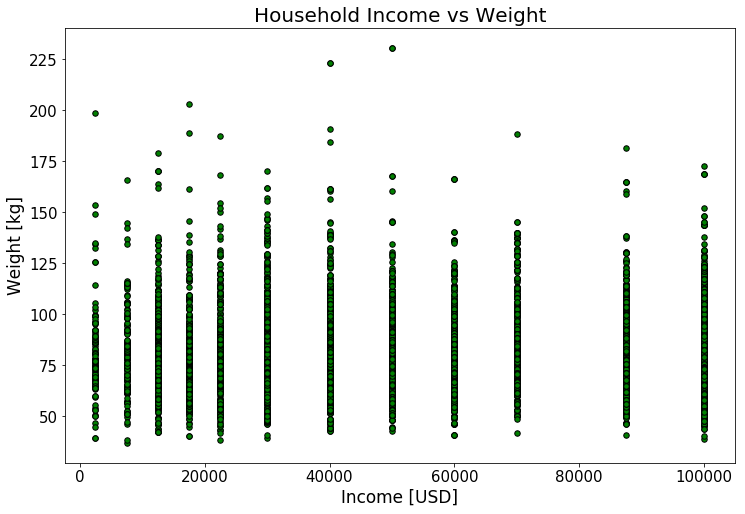

In [144]:
# Code to create a scatter plot
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['HHIncomeMid'], adult_df['Weight'], c='green', edgecolors='black', s=30)
plt.title("Household Income vs Weight", fontsize=20)
axs.set_xlabel("Income [USD]", fontsize=17)
axs.set_ylabel("Weight [kg]", fontsize=17)
axs.tick_params(labelsize=15)
plt.show()


In [145]:
# Code drops nans in columns of HHIncomeMid and Weight
new_df = adult_df.dropna(subset=['HHIncomeMid','Weight'])


In [113]:
# Code createsa lindear regression model
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = new_df['HHIncomeMid']
y_vals = new_df['Weight']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1069
Date:                Mon, 28 Dec 2020   Prob (F-statistic):              0.744
Time:                        13:23:55   Log-Likelihood:                -28869.
No. Observations:                6450   AIC:                         5.774e+04
Df Residuals:                    6448   BIC:                         5.775e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          82.7272      0.540    153.241      0.000      81.669      83.785
HHIncomeMid  2.648e-06    8.1e-06      0.327      0.744   -1.32e-05    1.85e-05
==============================================================================
Omnibus:                     1245.984   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3118.455
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       5.662   Cond. No.                     1.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
# Code gets correlation coefficient
from scipy import stats
corr = stats.pearsonr(new_df['HHIncomeMid'], new_df['Weight'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.004071784142274778
p-value: 0.743705201108374


In [111]:
# Code creates regression parameters and set the x-values for plot
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(new_df['HHIncomeMid']), np.max(new_df['HHIncomeMid']), 100)

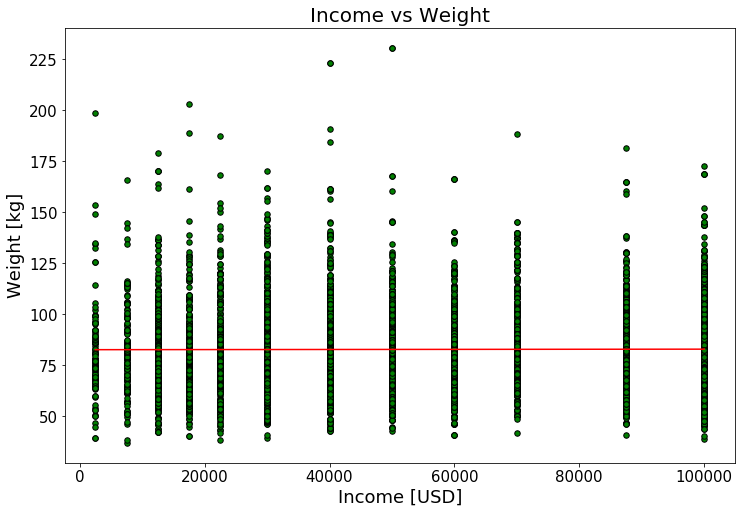

In [112]:
# Code creates a scatter plot with regression line
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['HHIncomeMid'], adult_df['Weight'], c='green', edgecolors='black', s=30)
plt.title("Income vs Weight", fontsize=20)
axs.set_xlabel("Income [USD]", fontsize=18)
axs.set_ylabel("Weight [kg]", fontsize=18)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
axs.tick_params(labelsize=15)
plt.show()
